<a href="https://colab.research.google.com/github/imshubhangisingh/Netflix-Content-Analysis-for-Strategic-Growth/blob/main/Top_Web_Streaming_Platform_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 16.6MB/s]


In [ ]:
df = pd.read_csv("netflix.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# From above info we got to know that we have missing values in following columns
 1. Director
 2. Cast
 3. Country
 4. date_added
 5. rating
 6. duration

In [ ]:
#number of unique values in our data
for i in df.columns: print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#First we split the director column and findout the mode of director to fill NaN value in director Column
split_dr = df['director'].str.split(',', expand=True)
dfdr = pd.concat([df['title'], split_dr], axis=1)
dfdr=pd.melt(dfdr, id_vars=["title"], value_name="director")
dfdr.drop(['variable'], axis=1, inplace=True)
dfdrunique=dfdr.drop_duplicates()
mdr= dfdrunique['director'].mode().iloc[0]
mdr
# Mode of Director= Rajiv Chilaka

'Rajiv Chilaka'

In [ ]:
#First we split the cast column and findout the mode of director to fill NaN value in cast Column
split_columns = df['cast'].str.split(',', expand=True)
result_df = pd.concat([df[['title', 'country']], split_columns], axis=1)
dfcast=pd.melt(result_df, id_vars=["title", 'country'], value_name="cast")
dfcast.drop(['variable'], axis=1, inplace=True)
dfcastunique=dfcast.drop_duplicates()
mcast= dfcastunique['cast'].mode().iloc[0]
mcast
# Mode of cast = Anupam kher

' Anupam Kher'

In [ ]:
#First we split the country column and findout the mode of director to fill NaN value in country Column
split_columns = df['country'].str.split(',', expand=True)
result_df = pd.concat([df['title'], split_columns], axis=1)
dfcountry=pd.melt(result_df, id_vars=["title"], value_name="country")
dfcountry.drop(['variable'], axis=1, inplace=True)
dfcountryunique=dfcountry.drop_duplicates()
mcountry= dfcountryunique['country'].mode().iloc[0]
mcountry
# Mode of country = United States

'United States'

In [ ]:
#First we split the rating column and findout the mode of director to fill NaN value in rating Column
mrating=df['rating'].mode().iloc[0]
mrating
# Mode of rating = TV-MA

'TV-MA'

In [ ]:
mduration=df['duration'].mode().iloc[0]
mduration

'1 Season'

#Filling NaN value with the Mode Value in the column Cast, Director, Country, Rating and Durationto the initital dataframe

In [ ]:
# inputation by filling Na by Mode value
df['cast'].fillna( mcast, inplace=True)
df['director'].fillna( mdr, inplace=True)
df['country'].fillna( mcountry, inplace=True)
df['rating'].fillna( mrating, inplace=True)
df['duration'].fillna( mduration, inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,Anupam Kher,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,Anupam Kher,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# checking info. Ignoring the missing value of date added since very few dates are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Unnesting column of director with titles

In [ ]:
split_columns = df['director'].str.split(',', expand=True)
result_df = pd.concat([df['title'], split_columns], axis=1)
dfdr=pd.melt(result_df, id_vars=["title"], value_name="director")
dfdr.drop(['variable'], axis=1, inplace=True)
dfdrunique=dfdr.drop_duplicates()
dfdrunique= dfdrunique.dropna()
dfdrunique

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Rajiv Chilaka
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Rajiv Chilaka
4,Kota Factory,Rajiv Chilaka
...,...,...
95585,Movie 43,Rusty Cundieff
102764,Walt Disney Animation Studios Short Films Coll...,Mike Gabriel
103787,HALO Legends,Hiroshi Yamazaki
104392,Movie 43,James Gunn


#Unnesting column of cast with titles

In [ ]:
split_columns = df['cast'].str.split(',', expand=True)
result_df = pd.concat([df['title'], split_columns], axis=1)
dfcast=pd.melt(result_df, id_vars=["title"], value_name="cast")
dfcast.drop(['variable'], axis=1, inplace=True)
dfcastunique=dfcast.drop_duplicates()
dfcastunique= dfcastunique.dropna()
dfcastunique

,title,cast
0,Dick Johnson Is Dead,Anupam Kher
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Jailbirds New Orleans,Anupam Kher
4,Kota Factory,Mayur More
...,...,...
417703,Black Mirror,Jon Hamm
424590,Social Distance,Ayize Ma'at
426510,Black Mirror,Oona Chaplin
433397,Social Distance,Lovie Simone



#Unnesting column of country with titles

In [ ]:
split_columns = df['country'].str.split(',', expand=True)
result_df = pd.concat([df['title'], split_columns], axis=1)
dfcountry=pd.melt(result_df, id_vars=["title"], value_name="country")
dfcountry.drop(['variable'], axis=1, inplace=True)
dfcountryunique=dfcountry.drop_duplicates()
dfcountryunique= dfcountryunique.dropna()
dfcountryunique

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States
3,Jailbirds New Orleans,United States
4,Kota Factory,India
...,...,...
78859,The Look of Silence,Germany
85496,Barbecue,Sweden
87666,The Look of Silence,Netherlands
94303,Barbecue,United States


#Unnesting column of listed_in with titles

In [ ]:
split_columns = df['listed_in'].str.split(',', expand=True)
result_df = pd.concat([df['title'], split_columns], axis=1)
dflist=pd.melt(result_df, id_vars=["title"], value_name="listed_in")
dflist.drop(['variable'], axis=1, inplace=True)
dflistunique=dflist.drop_duplicates()
dflistunique= dflistunique.dropna()
dflistunique

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Ganglands,Crime TV Shows
3,Jailbirds New Orleans,Docuseries
4,Kota Factory,International TV Shows
...,...,...
26414,Zindagi Gulzar Hai,TV Dramas
26415,Zinzana,Thrillers
26416,Zodiac,Thrillers
26417,Zombie Dumb,TV Comedies


#Merging unnested column's Table to create Super-table(d2)

In [ ]:
d=pd.merge(dfdrunique, dfcastunique,on="title", how="outer")
d1=pd.merge(d, dfcountryunique, on="title", how="outer" )
d2=pd.merge(d1, dflistunique, on="title", how="outer"  )
d2

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States,Documentaries
1,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202053,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202054,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202055,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202056,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


#Extracting rest of the colums from the orignal column and store in a new table(d3)
- Title
- show_id
- Type
- date_added
- release_Year
- rating
- duration

In [ ]:
d3=df[["title", "show_id", "type", "date_added", "release_year", "duration","rating" ]]
d3

,title,show_id,type,date_added,release_year,duration,rating
0,Dick Johnson Is Dead,s1,Movie,2021-09-25,2020,90,PG-13
1,Blood & Water,s2,TV Show,2021-09-24,2021,2,TV-MA
2,Ganglands,s3,TV Show,2021-09-24,2021,1,TV-MA
3,Jailbirds New Orleans,s4,TV Show,2021-09-24,2021,1,TV-MA
4,Kota Factory,s5,TV Show,2021-09-24,2021,2,TV-MA
...,...,...,...,...,...,...,...
8802,Zodiac,s8803,Movie,2019-11-20,2007,158,R
8803,Zombie Dumb,s8804,TV Show,2019-07-01,2018,2,TV-Y7
8804,Zombieland,s8805,Movie,2019-11-01,2009,88,R
8805,Zoom,s8806,Movie,2020-01-11,2006,88,PG


#Merging Super table(d2) to rest column table(d3) to create the final table (df)

In [ ]:
df_final=pd.merge(d2, d3, on="title", how="inner")
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2
2,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2
3,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2
4,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2
...,...,...,...,...,...,...,...,...,...,...,...
202053,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111
202054,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111
202055,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111
202056,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111


#Changing the Dtype of date and duration

date_added format will be changed into YYYY-MM-DD and turning the duration into integer by removing mins and season as a string

In [ ]:
#df_final["duration"]=df_final["duration"].str.split(' ').str[0]
df_final['duration'] = df_final['duration'].astype(int)
df_final["date_added"] = pd.to_datetime(df_final['date_added'])

#Final Table

In [ ]:
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2
2,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2
3,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2
4,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2
...,...,...,...,...,...,...,...,...,...,...,...
202053,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111
202054,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111
202055,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111
202056,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111


#Q1. Defining Problem Statement and Analysing basic metrics

Our primary objective is to identify the most promising types of shows to produce, thereby maximizing our growth potential in the entertainment industry. To achieve this goal, we need to comprehensively analyze the data and derive actionable insights that will enable us to make informed decisions on content creation and business expansion.

#Analysing Basic Matrices

In [ ]:
df_final.info()
# most column doesn't have any missing value excepy(date_added)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202058 entries, 0 to 202057
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         202058 non-null  object        
 1   director      202058 non-null  object        
 2   cast          202058 non-null  object        
 3   country       202058 non-null  object        
 4   listed_in     202058 non-null  object        
 5   show_id       202058 non-null  object        
 6   type          202058 non-null  object        
 7   date_added    201900 non-null  datetime64[ns]
 8   release_year  202058 non-null  int64         
 9   rating        202058 non-null  object        
 10  duration      202058 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 18.5+ MB


In [ ]:
mode_values = df_final.mode().iloc[0]
mode_values

title           Kahlil Gibran's The Prophet
director                      Rajiv Chilaka
cast                            Anupam Kher
country                       United States
listed_in              International Movies
show_id                               s7165
type                                  Movie
date_added              2020-01-01 00:00:00
release_year                           2018
rating                                TV-MA
duration                                  1
Name: 0, dtype: object

In [ ]:
unique_counts = df_final.nunique()
print(unique_counts)

title            8807
director         5120
cast            39296
country           197
listed_in          73
show_id          8807
type                2
date_added       1714
release_year       74
rating             17
duration          210
dtype: int64


#Q2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df_final.shape

(202058, 11)

In [ ]:
df_final.dtypes

title                   object
director                object
cast                    object
country                 object
listed_in               object
show_id                 object
type                    object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
dtype: object

1. There is No requirement of changing any column to categorical column.
2. Missing value already detected and fixed my filling it with mode value

In [ ]:
#Statistical summary
df_final.describe().round(2)

,release_year,duration
count,202058.00,202058.00
mean,2013.45,77.69
std,9.01,51.48
min,1925.00,1.00
25%,2012.00,4.00
50%,2016.00,95.00
75%,2019.00,112.00
max,2021.00,312.00


In [ ]:
df_final.describe(include=object)

,title,director,cast,country,listed_in,show_id,type,rating
count,202058,202058,202058,202058,202058,202058,202058,202058
unique,8807,5120,39296,197,73,8807,2,17
top,Kahlil Gibran's The Prophet,Rajiv Chilaka,Anupam Kher,United States,International Movies,s7165,Movie,TV-MA
freq,700,50790,2265,61764,27138,700,145910,73982


In [ ]:
df_final.describe(include="datetime")

<ipython-input-61-04a1c61c1b98>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final.describe(include="datetime")


,date_added
count,201900
unique,1714
top,2020-01-01 00:00:00
freq,3748
first,2008-01-01 00:00:00
last,2021-09-25 00:00:00


#Q3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
#unique values
unique_count= df_final["title"].nunique()
print(unique_count)

#Value count
Value_count = df_final["title"].drop_duplicates().value_counts()
print(Value_count)

8807
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64


In [ ]:
#unique values
count_of_col= df_final['director'].nunique()
print(count_of_col)

#Value count
Value_count_dr = df_final[["title", "director"]].drop_duplicates()
Value_count_dr["director"].value_counts()

5120


Rajiv Chilaka       2656
Raúl Campos           18
 Jan Suter            18
Marcus Raboy          16
Suhas Kadav           16
                    ... 
Will Eisenberg         1
Marina Seresesky       1
Kenny Leon             1
James Dearden          1
Mozez Singh            1
Name: director, Length: 5120, dtype: int64

In [ ]:
#unique values
count_of_col= df_final['rating'].nunique()
print(count_of_col)

17


In [ ]:
# Unique values os Movies and TV shows
df_type=df_final.groupby('type')
df_type["title"].nunique()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

# 4.) Visual Analysis - Univariate, Bivariate after pre-processing of the data

4.1.1 Univariate Analysis of categorical variavle that is Rating

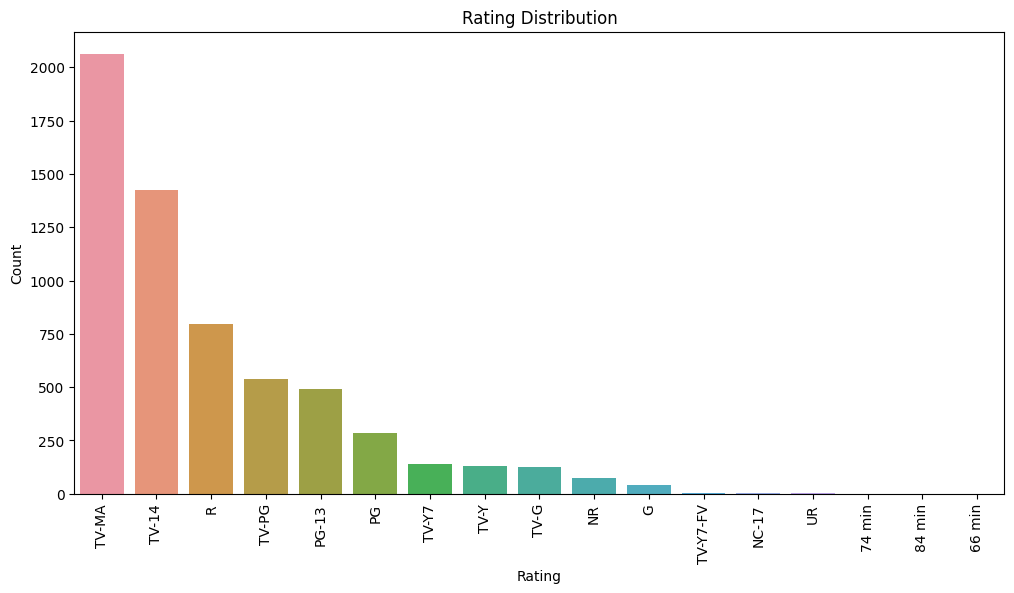

In [ ]:
genere=df_final[["title","rating", "type"]]
genere=genere.drop_duplicates()
movies_df = genere[genere['type'] == 'Movie']
tv_shows_df = genere[genere['type'] == 'TV Show']

movie_genre_counts = movies_df['rating'].value_counts()
# Plot the bar graph for movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_genre_counts.index, y=movie_genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

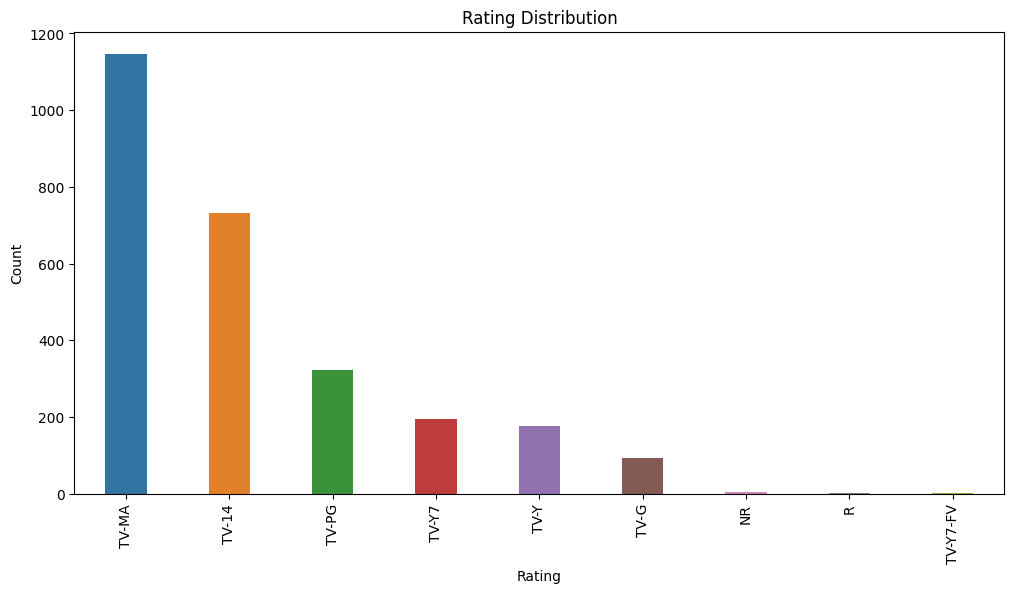

In [ ]:
tv_show_counts = tv_shows_df['rating'].value_counts()
# Plot the bar graph for movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_show_counts.index, y=tv_show_counts.values, width=0.4)
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

4.1.2 Univariate Analysis of contineous variable that is Duration of a Movie

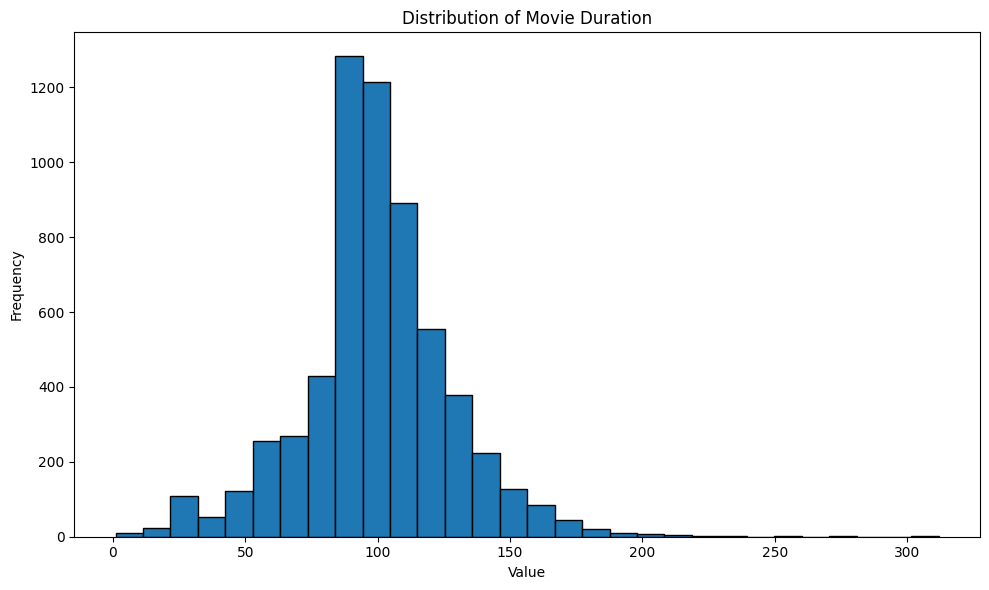

In [ ]:
# Ploting the histogram of Duration of Movies
genere=df_final[["title","duration", "type"]]
genere=genere.drop_duplicates()
movies_df = genere[genere['type'] == 'Movie']

plt.figure(figsize=(10, 6))
plt.hist(movies_df['duration'], bins=30, edgecolor='k')  # You can adjust the number of bins for better granularity
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')
plt.tight_layout()
plt.show()

4.2 Boxplot for a contineous variable

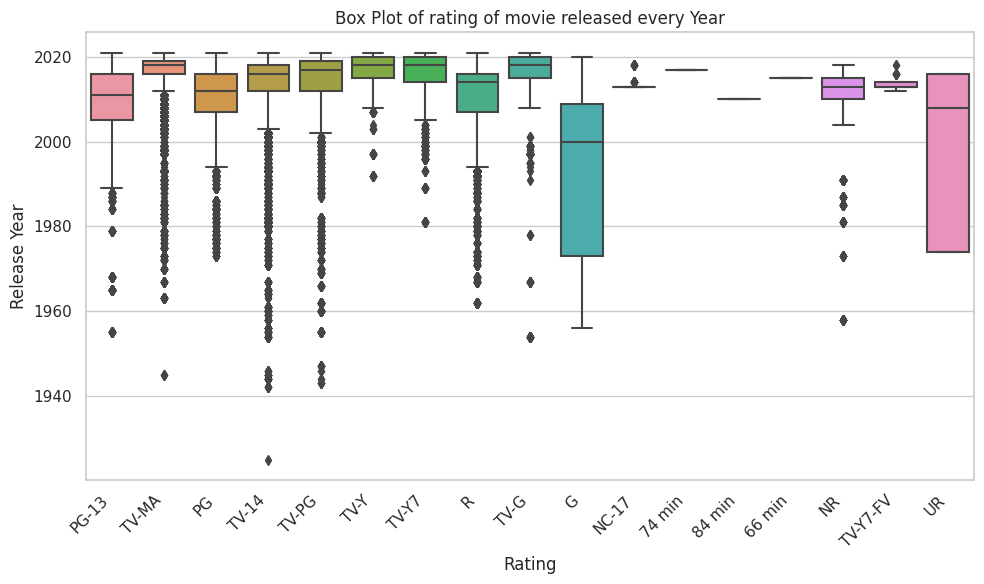

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=df_final)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better visibility
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.title('Box Plot of rating of movie released every Year')
plt.tight_layout()
plt.show()

#Comparison of tv shows vs. movies?

Count of TV Shows & Movies Released in Different Years

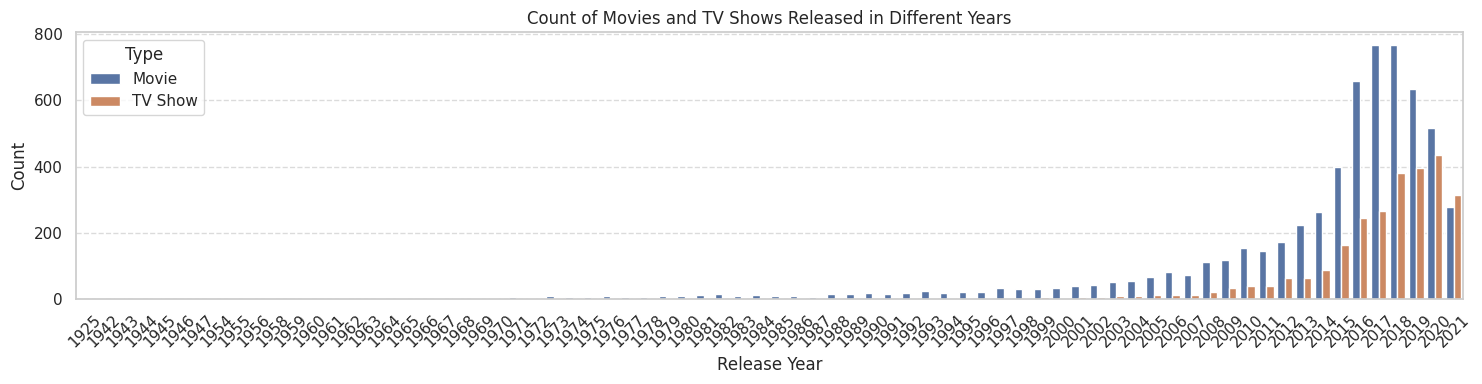

In [ ]:
# Create the Count Plot of Release Year of Movies & Tv series
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='release_year', hue='type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows Released in Different Years')


plt.legend(title='Type', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#Duration of Tv Shows and Movies.

Frequenct of the Duration of TV Show

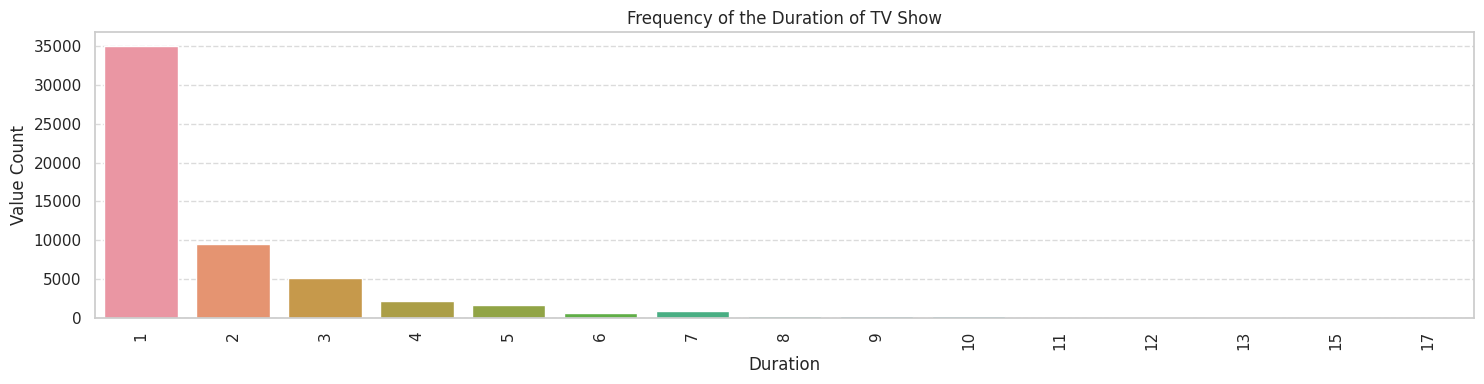

In [ ]:
 #dist plot of duration
 # Separate the data for movies and TV shows
movies_data = df_final[df_final['type'] == 'Movie']
tv_shows_data = df_final[df_final['type'] == 'TV Show']

plt.figure(figsize=(15, 4))
sns.countplot(data=tv_shows_data, x='duration')
plt.xlabel('Duration')
plt.ylabel('Value Count')
plt.title('Frequency of the Duration of TV Show')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Count of Movies Released in Different Years

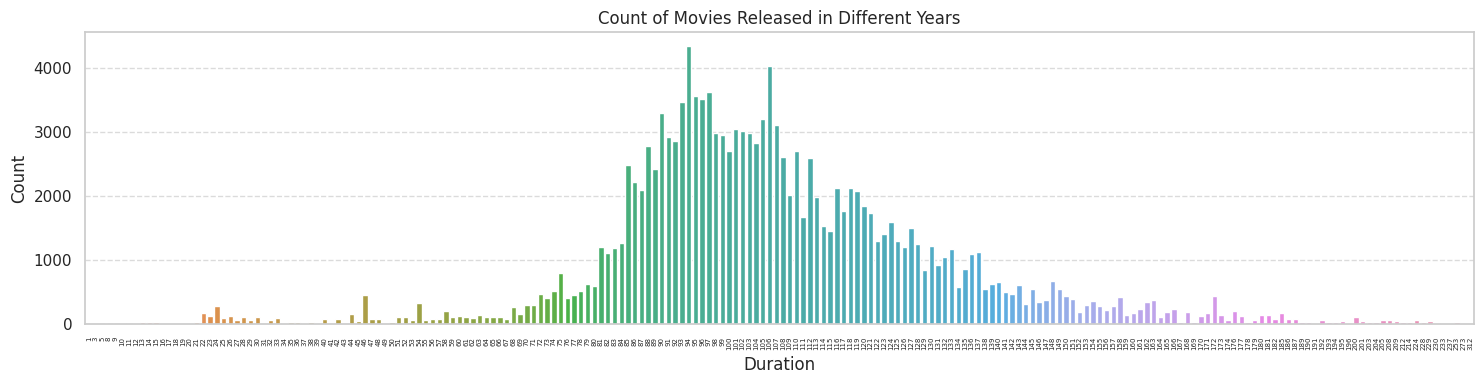

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=movies_data, x='duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Count of Movies Released in Different Years')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#Best Genere for Movies and TV Shows

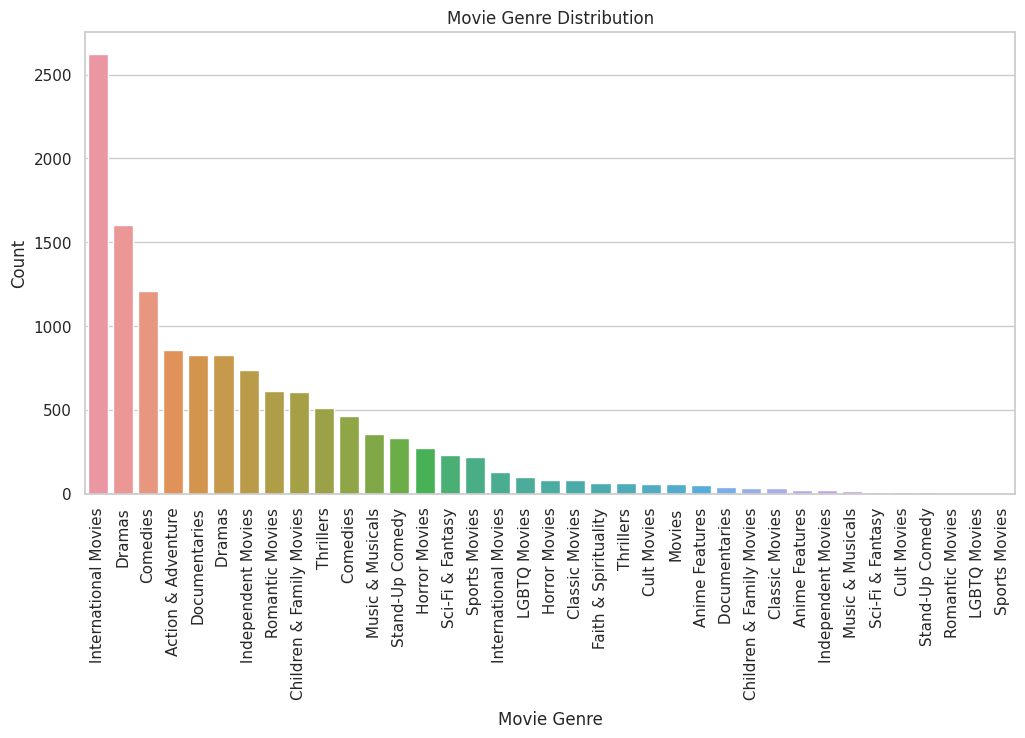

In [ ]:
genere=df_final[["title","listed_in", "type"]]
genere=genere.drop_duplicates()
movies_df = genere[genere['type'] == 'Movie']
tv_shows_df = genere[genere['type'] == 'TV Show']

movie_genre_counts = movies_df['listed_in'].value_counts()
# Plot the bar graph for movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_genre_counts.index, y=movie_genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Distribution')
plt.show()

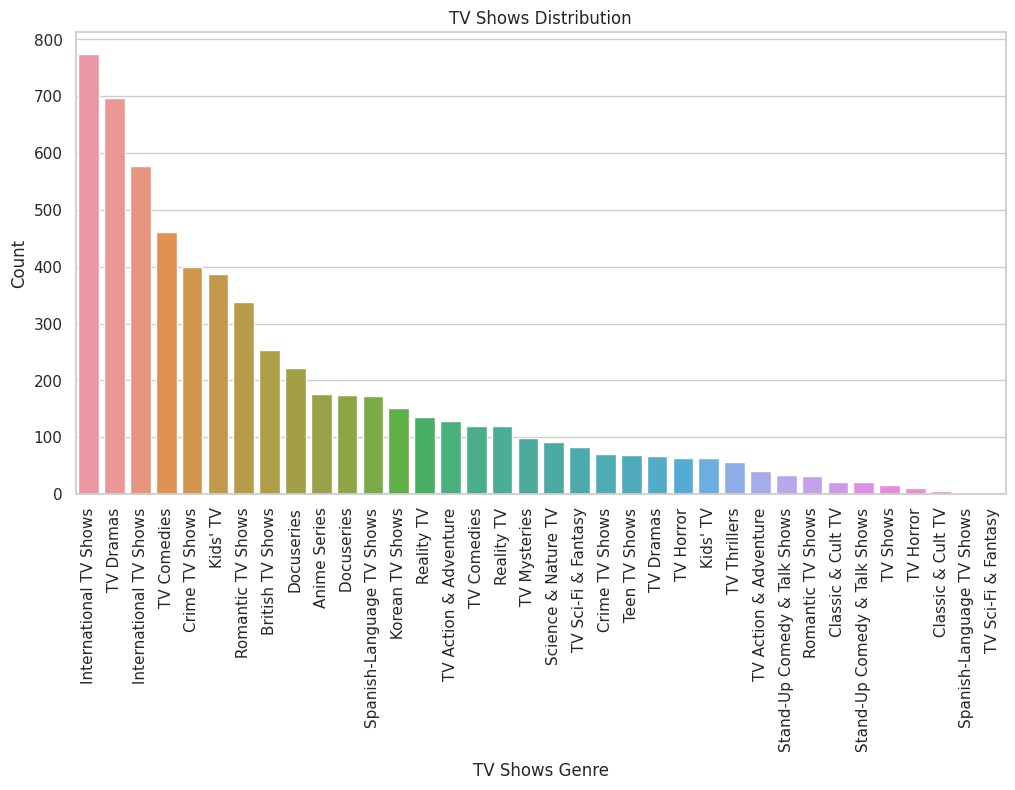

In [ ]:
genere=df_final[["title","listed_in", "type"]]
genere=genere.drop_duplicates()
movies_df = genere[genere['type'] == 'Movie']
tv_shows_df = genere[genere['type'] == 'TV Show']

tv_shows_genre_counts = tv_shows_df['listed_in'].value_counts()
# Plot the bar graph for TV Shows genres
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_shows_genre_counts.index, y=tv_shows_genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('TV Shows Genre')
plt.ylabel('Count')
plt.title('TV Shows Distribution')
plt.show()

#Time series plot of date_added column

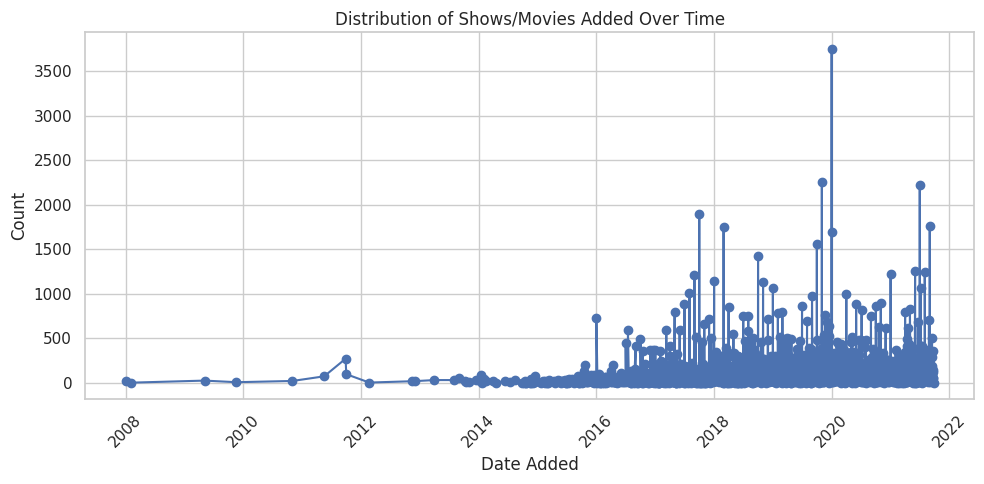

In [ ]:
# Time series plot of date_added column
date_counts = df_final.groupby('date_added').size()
plt.figure(figsize=(10, 5))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.title('Distribution of Shows/Movies Added Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


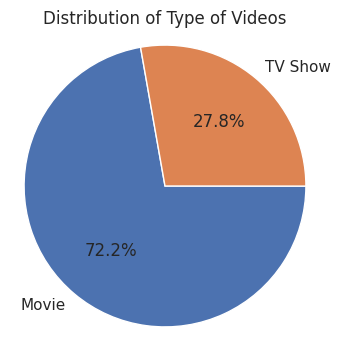

In [ ]:
# Create the Pie Chart for type
type_count = df_final['type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(type_count, labels=type_count.index,  autopct='%1.1f%%', startangle=100)
plt.axis('equal')
plt.title('Distribution of Type of Videos')
plt.show()

#Bivariate Plots

Type vs. Release_year stacked bar plot

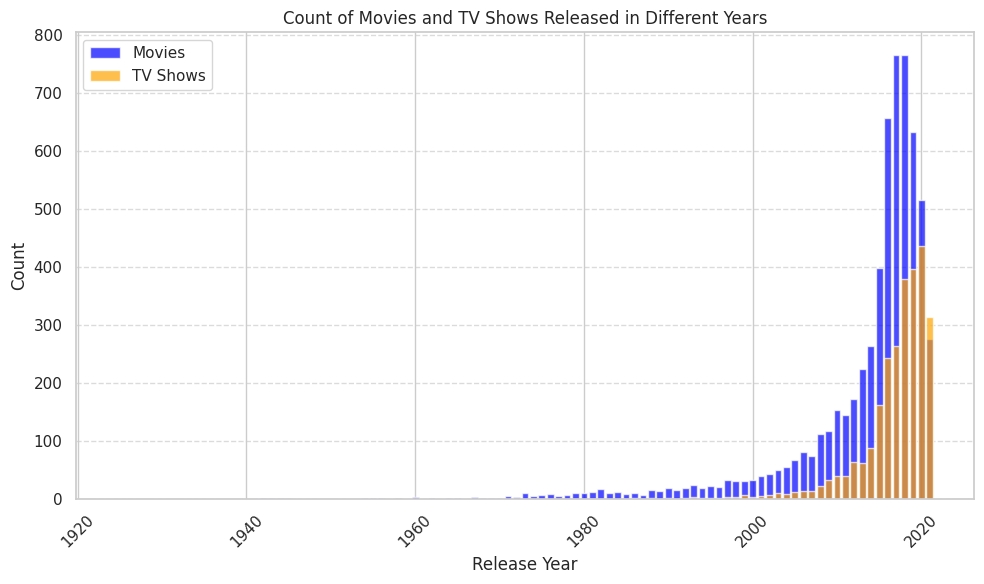

In [ ]:
# Filter the DataFrame for movies and TV shows separately
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Count the occurrences of each release year for movies and TV shows
movies_counts = movies_df['release_year'].value_counts().sort_index()
tv_shows_counts = tv_shows_df['release_year'].value_counts().sort_index()

# Create the Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(movies_counts.index, movies_counts.values, label='Movies', color='blue', alpha=0.7)
plt.bar(tv_shows_counts.index, tv_shows_counts.values, label='TV Shows', color='orange', alpha=0.7)

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows Released in Different Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

How has the number of movies & TV Shows released per year changed over the last 20-30 years?

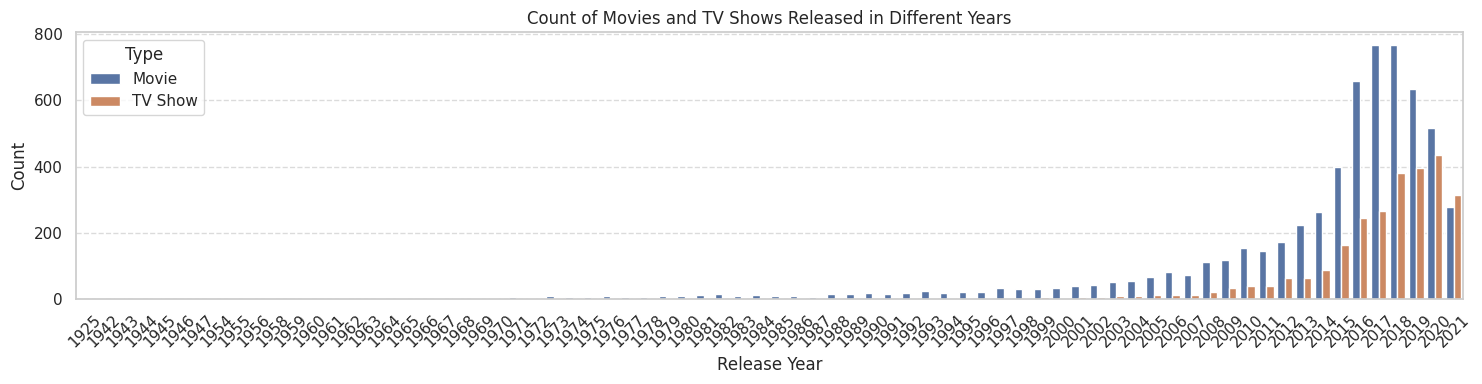

In [ ]:
# Create the Count Plot
plt.figure(figsize=(15, 4))
sns.countplot(x='release_year', hue='type', data=df)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows Released in Different Years')
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Top Rating of TV Show and Movies

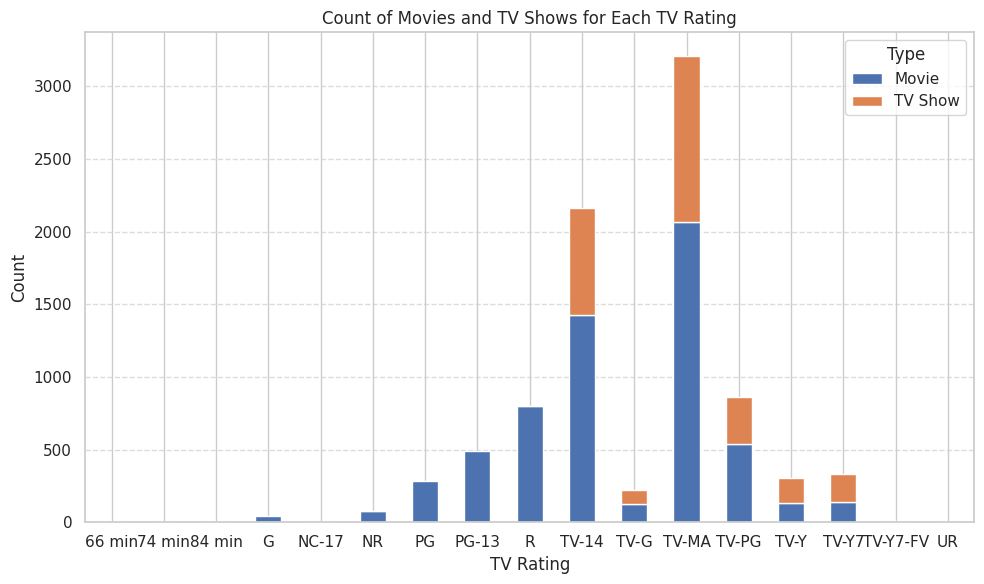

In [ ]:
# Create the Stacked bar Plot

# Create a cross-tabulation (crosstab) to get the count of movies and TV shows for each TV rating
rating_type_counts = pd.crosstab(df['rating'], df['type'])

# Create the Stacked Bar Plot
rating_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('TV Rating')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows for Each TV Rating')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# have to correct this
df_final["rating"].value_counts()

TV-MA       73982
TV-14       43951
R           25859
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

#What is the best time to launch a TV show?

<ipython-input-84-32ab6da7de63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['Release_year'] = tv_shows_df['date_added'].dt.year
<ipython-input-84-32ab6da7de63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['Release_month'] = tv_shows_df['date_added'].dt.month


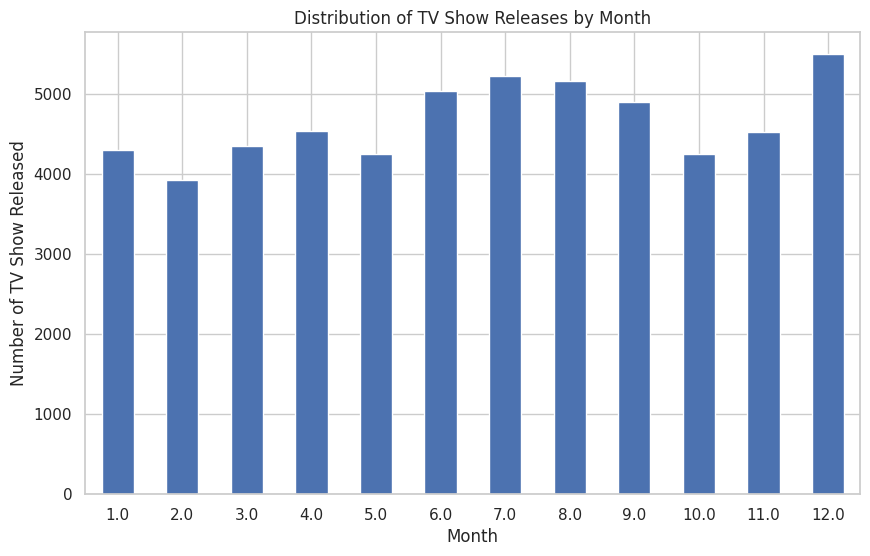

The best month to launch a TV Show is: 12.0
The lowest month to launch a TV Show is: 2.0


In [ ]:

# Filter the dataset to only include TV shows
tv_shows_df = df_final[df_final['type'] == 'TV Show']
# Extract the release year and month from the 'Date_added' column
tv_shows_df['Release_year'] = tv_shows_df['date_added'].dt.year
tv_shows_df['Release_month'] = tv_shows_df['date_added'].dt.month

# Group the TV shows by release month and count the number of TV shows in each month
tv_shows_df_by_month = tv_shows_df.groupby('Release_month').size()

# Plotting the distribution of TV show releases by month
plt.figure(figsize=(10, 6))
tv_shows_df_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of TV Show Released')
plt.title('Distribution of TV Show Releases by Month')
plt.xticks(rotation=0)
plt.show()

# Find the month with the highest and lowest number of TV show releases
best_month = tv_shows_df_by_month.idxmax()
lowest_month = tv_shows_df_by_month.idxmin()
# Output the best and lowest months
print(f"The best month to launch a TV Show is: {best_month}")
print(f"The lowest month to launch a TV Show is: {lowest_month}")

The best month to launch a TV Show is: 12.0

The lowest month to launch a TV Show is: 2.0

<ipython-input-83-4764ab37156c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Release_year'] = movies_df['date_added'].dt.year
<ipython-input-83-4764ab37156c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Release_month'] = movies_df['date_added'].dt.month


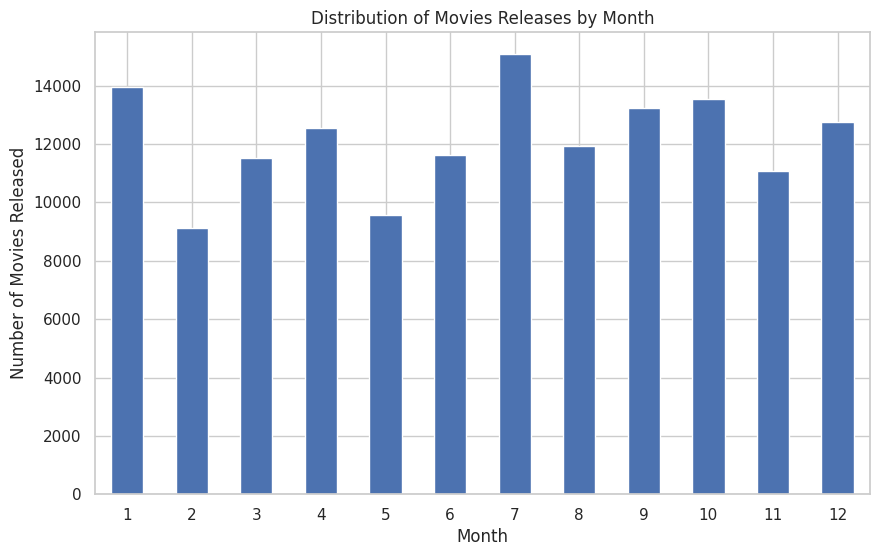

The best month to launch a Movies is: 7
The lowest month to launch a Movies is: 2


In [ ]:
# Filter the dataset to only include TV shows
movies_df = df_final[df_final['type'] == 'Movie']
# Extract the release year and month from the 'Date_added' column
movies_df['Release_year'] = movies_df['date_added'].dt.year
movies_df['Release_month'] = movies_df['date_added'].dt.month

# Group the TV shows by release month and count the number of TV shows in each month
movies_df_by_month = movies_df.groupby('Release_month').size()

# Plotting the distribution of TV show releases by month
plt.figure(figsize=(10, 6))
movies_df_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.title('Distribution of Movies Releases by Month')
plt.xticks(rotation=0)
plt.show()

# Find the month with the highest and lowest number of TV show releases
best_month = movies_df_by_month.idxmax()
lowest_month = movies_df_by_month.idxmin()
# Output the best and lowest months
print(f"The best month to launch a Movies is: {best_month}")
print(f"The lowest month to launch a Movies is: {lowest_month}")

The best month to launch a Movies is: 7

The lowest month to launch a Movies is: 2

#Top 10 Countries of highest content released

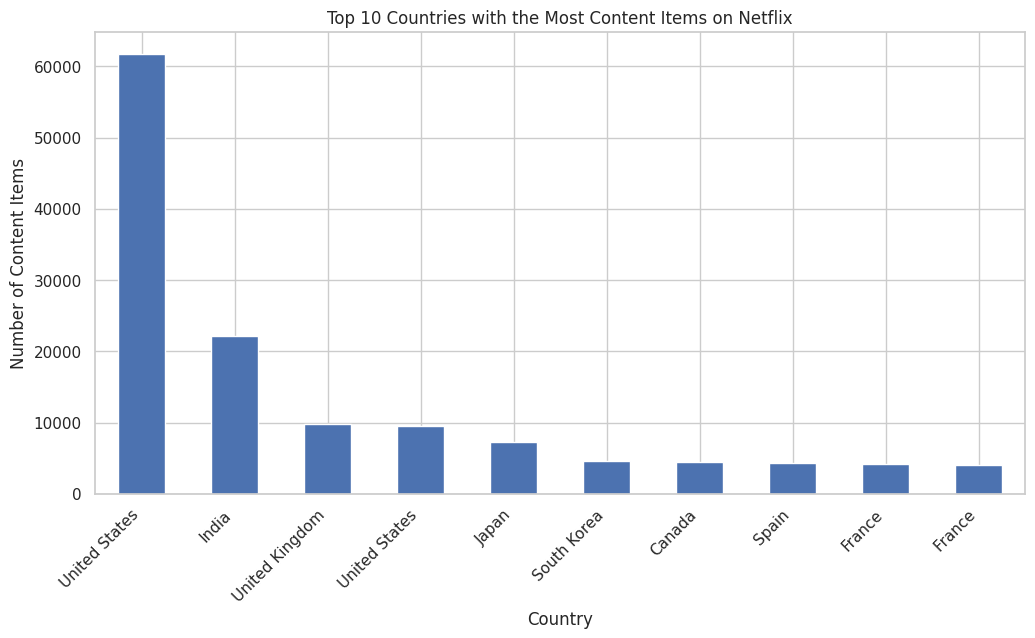

The Highest_content_country is: United States
The lowest_content_country is:  Nicaragua


In [ ]:
# Group the content (movies/TV shows) by country and count the number of items in each country
content_by_country = df_final.groupby('country').size().sort_values(ascending=False)

# Select the top 'n' countries to plot (you can adjust the value of 'n' as per your requirement)
n = 10
top_countries = content_by_country.head(n)

# Plotting the number of content items by country using a bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Content Items')
plt.title(f'Top {n} Countries with the Most Content Items on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()

Highest_content_country = content_by_country.idxmax()
lowest_content_country= content_by_country.idxmin()
print(f"The Highest_content_country is: {Highest_content_country }")
print(f"The lowest_content_country is: {lowest_content_country}")

The Highest_content_country is: United States

The lowest_content_country is:  Nicaragua

#Box plot for rating and duration

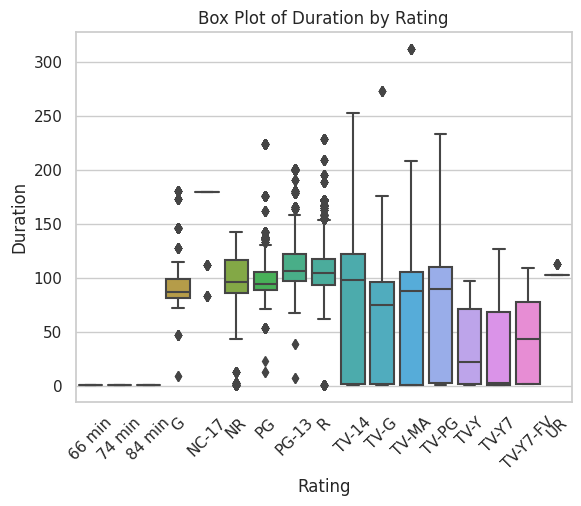

In [ ]:
#Box plot:-
df_final['Rating_codes'] = df_final['rating'].astype('category').cat.codes
sns.boxplot(x='Rating_codes', y='duration', data=df_final)
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Box Plot of Duration by Rating')
plt.xticks(ticks=df_final['Rating_codes'].unique(), labels=df_final['rating'].unique(), rotation=45)
plt.show()


#Heatmap and Pair Plot

Plot for releasr_year Vs Duration

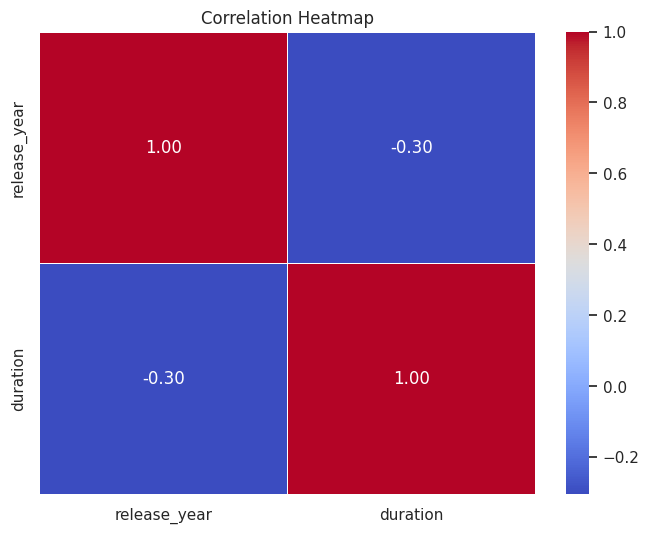

In [ ]:
#heatmap
numerical_df = df_final[['release_year', 'duration']]
correlation_matrix = numerical_df.corr()

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


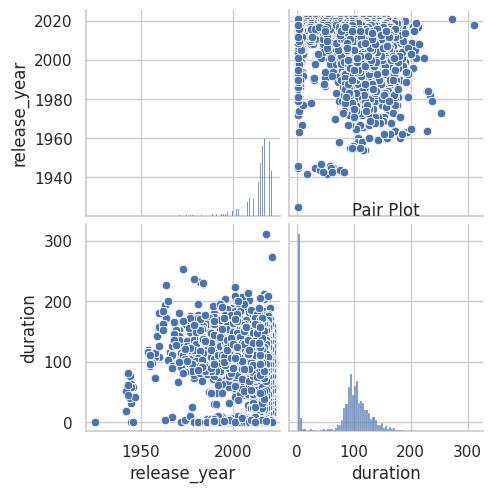

In [ ]:
#pair Plot
sns.pairplot(numerical_df)
plt.title('Pair Plot')
plt.show()

#5.) Missing Value & Outlier check (Treatment optional)

In [ ]:
missing_values = df_final.isnull()
missing_values_count = missing_values.sum()
missing_values_count
#We have few missing value that is negligible

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
Rating_codes      0
dtype: int64

#6.) Insights based on Non-Graphical and Visual Analysis

In [ ]:
genere=df_final[["title","listed_in"]]
genere=genere.drop_duplicates()

most_common_directors = genere['listed_in'].mode()
most_common_directors

0     International Movies
Name: listed_in, dtype: object

#6.1) Comments on the range of attributes

1. Types- Only 2 types of types are there, Movies & Tv Shows
2. Titles- There are 8807 unique titles.
3. Directors- 5120 unique Directors
4. Cast- 39296 unique cast
5. Country - 197 Country
6. Date_added - it lies between 1925 -2021
7. Release_Year - 1925 to 2021
8. Rating - 17 types of rating
9. Duration - For TV shows the range of duration is 1-10 which resembles season and for movies it ranges from 22-230
10. Listed_in - 73 Generes

#6.2) Comments on the distribution of the variables

1. Types- There are 6131 Movies & 2676 TV Show listed in Netfilx according to given dataframe
2. Titles- Not a valuable insight
3. Directors- Rajiv Chilak
4. Cast- Anupam Kher
5. Country - United State
6. Date Added- Not a valuable insight
7. Release_Year - 2018
8. Rating - TV-MA
9. Duration - For TV Shows season 1 is the highest and for movies highest is in range of 90-110
10. Listed_in - International Movies


#6.3) 6.3 Comments for each univariate and bivariate plot

It is described below the every plot

#7.) Business Insight Should include patterns observed in the data along with what you can infer from it

- The demand of watching Movies and TV Shows in OTT platform in increased drastically in last 20 Years
- Best time to release Movies is July and for TV shows is December

#8.) Recommendations Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

- Creating Movies and TV Shows and releasing only in OTT is a good option of expanding the business.
- Adding More and More Movies, Series and TV Shows would increase the chance of generating more revenue
- Our most of the audiences are adult we can sat that by highest content available is of genere TV-MA, we can target those audience and encourage then to take subscription by giving sone good offer.
- Highest movies listed in OTT release in United States. US is the highest content creator and India is second highest content creator. Listing More and More content fron these two contries help us to give most benifits.

#Answer of Problem Statement

Q1. Our primary objective is to identify the most promising types of shows to produce, thereby maximizing our growth potential in the entertainment industry. To achieve this goal, we need to comprehensively analyze the data and derive actionable insights that will enable us to make informed decisions on content creation and business expansion.

Ans- Movies and TV shows both are in demand. Rate of Growth is similar for both of them. Still if need to select one, according to data movies is first choice.

To create a successful movie on Netflix, key factors should be considered. Enlist renowned actor Anupam Kher, persuade accomplished director Rajiv Chilak. Optimum duration: 90-120 minutes, genres: drama and comedy. Mandatory release in the US and India. Ideal time: July. Combining talent, appealing genres, and strategic release enhances the movie's potential for success on the global streaming platform.